In [8]:
import os
import matplotlib.pyplot as pplt
import matplotlib.image as ppltimg

trainingData = os.listdir("train/")

print(trainingData[0])

dog.8011.jpg


In [12]:
labels = []

for catOrDog in trainingData:
    if "cat" in catOrDog:
        labels.append(0)
    elif "dog" in catOrDog:
        labels.append(1)

print(labels[0:3])

[1, 0, 1]


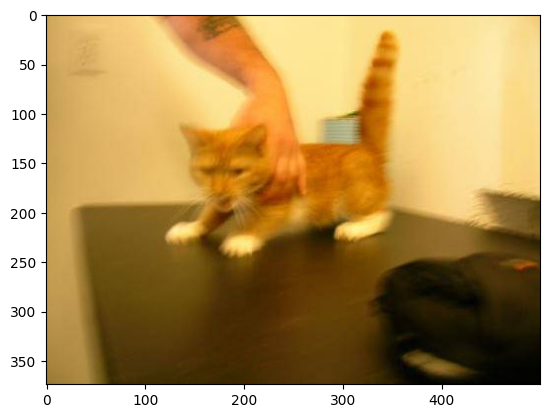

In [16]:
catImage = ppltimg.imread("train/cat.0.jpg")

pplt.imshow(catImage)

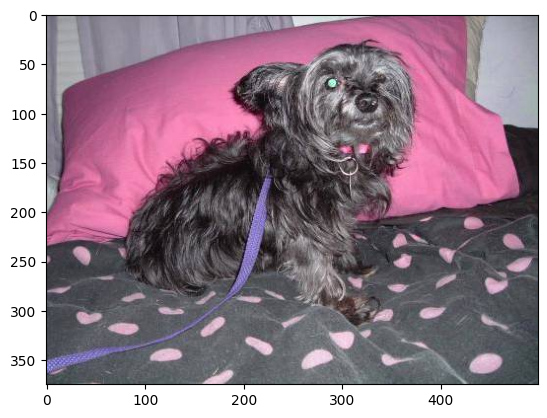

In [17]:
dogImage = ppltimg.imread("train/dog.0.jpg")

pplt.imshow(dogImage)